# 1. 데이터 전처리


In [2]:
import pandas as pd

def read_abstracts_from_xls(file_path):
    try:
        # CSV 파일 읽기
        df = pd.read_excel(file_path)
        # Abstract 컬럼의 값들을 리스트로 저장
        abstracts = df['Abstract'].tolist()
        
        return abstracts
    except Exception as e:
        print("Error:", e)
        return []

# CSV 파일 경로 설정
file_path = "savedrecs.xls"

# Abstract 컬럼 값들을 리스트로 읽어오기
abstract_list = read_abstracts_from_xls(file_path)

# 결과 출력
print(abstract_list)


['The oral health of older people living in residential aged care facilities has been widely recognised as inadequate. The aim of this paper is to identify barriers to effective engagement of health-care providers in oral care in residential aged care facilities. A literature review was conducted using MEDline, CINAHL, Web of Science, Academic Search Complete and PsychInfo between 2000 and 2013, with a grey literature search of government and non-government organisation policy papers, conference proceedings and theses. Keywords included: dental/oral care, residential aged care, health-care providers, barriers, constraints, and limitations. A thematic framework was used to synthesise the literature according to a series of oral health-care provision barriers, health-care provider barriers, and cross-sector collaborative barriers. A range of system, service and practitioner level barriers were identified that could impede effective communication/collaboration between different health-car

In [3]:
from sklearn.datasets import fetch_20newsgroups
import re

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


docs_df = pd.DataFrame({'document':abstract_list})
def remove_special_characters(text):
    # 알파벳이 아닌 문자를 공백으로 대체
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text
# 특수 문자 제거
docs_df['clean_doc'] = docs_df['document'].apply(remove_special_characters)
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
docs_df['clean_doc'] = docs_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
docs_df['clean_doc'] = docs_df['clean_doc'].apply(lambda x: x.lower())




In [4]:
docs_df["clean_doc"]

0      oral health older people living residential ag...
1      this paper explores health care purchasing coa...
2      introduction having health care home been show...
3      role health care inequalities social inequalit...
4      purpose examine performance properties revised...
                             ...                        
295    literature highlights that disparities health ...
296    affordable care greatly expanded health care c...
297    objectivethe objective study evaluate effectiv...
298    this paper introduces this mini series vertica...
299    backgroundan asymmetrical oral disease burden ...
Name: clean_doc, Length: 300, dtype: object

# 2. 토큰화

In [5]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = docs_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [6]:
tokenized_doc

0      [oral, health, older, people, living, resident...
1      [paper, explores, health, care, purchasing, co...
2      [introduction, health, care, home, shown, asso...
3      [role, health, care, inequalities, social, ine...
4      [purpose, examine, performance, properties, re...
                             ...                        
295    [literature, highlights, disparities, health, ...
296    [affordable, care, greatly, expanded, health, ...
297    [objectivethe, objective, study, evaluate, eff...
298    [paper, introduces, mini, series, vertical, eq...
299    [backgroundan, asymmetrical, oral, disease, bu...
Name: clean_doc, Length: 300, dtype: object

# 3. 토픽 모델링 LDA
### 인코딩

In [7]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 
# 두번째 문서 단어 행렬

[(6, 6), (21, 1), (28, 6), (34, 1), (49, 2), (57, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 2), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 2), (112, 1), (113, 1), (114, 1), (115, 3), (116, 1), (117, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 2), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1)]


In [8]:
# 두번째 문서 단어 중 6에 할당된 단어가 6번 나옴

print(dictionary[0])


academic


In [9]:

len(dictionary)


5005

In [10]:
len(corpus[0])

82

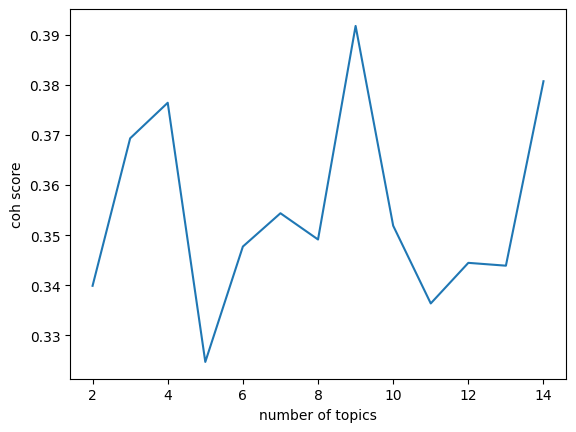

In [25]:
import matplotlib.pyplot as plt
import gensim

from gensim.models import CoherenceModel

coh_values=[]
for i in range(2, 15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=dictionary, passes=15)

    coh_model_lda = CoherenceModel(model=ldamodel,texts=tokenized_doc,dictionary=dictionary, topn=10)
    coh_lda = coh_model_lda.get_coherence()
    coh_values.append(coh_lda)
    
x = range(2,15)
plt.plot(x, coh_values)
plt.xlabel("number of topics")
plt.ylabel("coh score")
plt.show()

In [42]:
NUM_TOPICS = 9
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS,random_state=777, id2word=dictionary, passes=20)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.050*"care" + 0.030*"health" + 0.011*"children" + 0.009*"women" + 0.008*"child" + 0.007*"visits" + 0.007*"practices" + 0.007*"providers" + 0.006*"visit" + 0.005*"study"')
(1, '0.036*"care" + 0.030*"health" + 0.015*"costs" + 0.008*"pound" + 0.007*"providers" + 0.006*"cost" + 0.005*"women" + 0.005*"prediabetes" + 0.005*"equity" + 0.005*"veterans"')
(2, '0.029*"health" + 0.028*"care" + 0.011*"ultrasound" + 0.009*"insurance" + 0.007*"results" + 0.007*"centers" + 0.006*"child" + 0.006*"adolescents" + 0.006*"coverage" + 0.006*"expenditures"')
(3, '0.050*"health" + 0.031*"care" + 0.019*"dental" + 0.015*"population" + 0.013*"literacy" + 0.010*"oral" + 0.009*"children" + 0.009*"primary" + 0.007*"dementia" + 0.007*"parents"')
(4, '0.075*"health" + 0.053*"care" + 0.011*"primary" + 0.011*"mental" + 0.010*"services" + 0.006*"system" + 0.005*"study" + 0.005*"patients" + 0.004*"results" + 0.004*"public"')
(5, '0.063*"care" + 0.047*"health" + 0.015*"primary" + 0.009*"dental" + 0.008*"oral" + 0.0

In [43]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [14]:
import pandas as pd

def read_abstracts_from_xls(file_path):
    try:
        # CSV 파일 읽기
        df = pd.read_excel(file_path)
        # Abstract 컬럼의 값들을 리스트로 저장
        abstracts = df['Abstract'].tolist()
        
        return abstracts
    except Exception as e:
        print("Error:", e)
        return []

# CSV 파일 경로 설정
file_path = "savedrecs.xls"

# Abstract 컬럼 값들을 리스트로 읽어오기
abstract_list = read_abstracts_from_xls(file_path)

# 결과 출력
print(abstract_list)


['The oral health of older people living in residential aged care facilities has been widely recognised as inadequate. The aim of this paper is to identify barriers to effective engagement of health-care providers in oral care in residential aged care facilities. A literature review was conducted using MEDline, CINAHL, Web of Science, Academic Search Complete and PsychInfo between 2000 and 2013, with a grey literature search of government and non-government organisation policy papers, conference proceedings and theses. Keywords included: dental/oral care, residential aged care, health-care providers, barriers, constraints, and limitations. A thematic framework was used to synthesise the literature according to a series of oral health-care provision barriers, health-care provider barriers, and cross-sector collaborative barriers. A range of system, service and practitioner level barriers were identified that could impede effective communication/collaboration between different health-car

In [15]:
import pandas as pd

def read_abstracts_from_xls(file_path):
    try:
        # CSV 파일 읽기
        df = pd.read_excel(file_path)
        # Abstract 컬럼의 값들을 리스트로 저장
        abstracts = df['Abstract'].tolist()
        
        return abstracts
    except Exception as e:
        print("Error:", e)
        return []

# CSV 파일 경로 설정
file_path = "savedrecs.xls"

# Abstract 컬럼 값들을 리스트로 읽어오기
abstract_list = read_abstracts_from_xls(file_path)

# 결과 출력
print(abstract_list)


['The oral health of older people living in residential aged care facilities has been widely recognised as inadequate. The aim of this paper is to identify barriers to effective engagement of health-care providers in oral care in residential aged care facilities. A literature review was conducted using MEDline, CINAHL, Web of Science, Academic Search Complete and PsychInfo between 2000 and 2013, with a grey literature search of government and non-government organisation policy papers, conference proceedings and theses. Keywords included: dental/oral care, residential aged care, health-care providers, barriers, constraints, and limitations. A thematic framework was used to synthesise the literature according to a series of oral health-care provision barriers, health-care provider barriers, and cross-sector collaborative barriers. A range of system, service and practitioner level barriers were identified that could impede effective communication/collaboration between different health-car

## TF-IDF

In [16]:
detokenized_doc = []
for i in range(len(abstract_list)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

# 다시 text['headline_text']에 재저장


In [17]:
detokenized_doc

['oral health older people living residential aged care facilities widely recognised inadequate paper identify barriers effective engagement health care providers oral care residential aged care facilities literature review conducted using medline cinahl science academic search complete psychinfo grey literature search government government organisation policy papers conference proceedings theses keywords included dental oral care residential aged care health care providers barriers constraints limitations thematic framework used synthesise literature according series oral health care provision barriers health care provider barriers cross sector collaborative barriers range system service practitioner level barriers identified could impede effective communication collaboration different health care providers residents carers regarding oral care impeded internal barriers level findings indicated several areas investigation consideration regarding policy practice improvements research re

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english', max_features= 3000)
X = vectorizer.fit_transform(detokenized_doc)


In [19]:
X.shape


(300, 3000)

## 토픽모델링

In [82]:
lda_model = LatentDirichletAllocation(n_components=8,learning_method='online',max_iter=20)
lda_top = lda_model.fit_transform(X)


In [83]:

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.13011209 0.12892383 0.12849906 ... 0.1288729  0.12878796 0.12858026]
 [0.12907743 0.12826453 0.1288012  ... 0.12818116 0.12872755 0.12872479]
 [1.463571   0.76344348 0.40088688 ... 0.40933199 0.80496455 1.13450283]
 ...
 [0.1288719  0.12869478 0.1285826  ... 0.12879228 0.12910487 0.12925931]
 [0.12914645 0.12871799 0.1291723  ... 0.12819618 0.1295111  0.12825936]
 [0.12884568 0.12848866 0.12903444 ... 0.12903801 0.12898068 0.12846709]]
(8, 3000)


In [84]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)



Topic 1: [('care', 0.14), ('health', 0.13), ('practice', 0.13), ('primary', 0.13), ('interventions', 0.13)]
Topic 2: [('health', 0.14), ('care', 0.14), ('access', 0.13), ('social', 0.13), ('cost', 0.13)]
Topic 3: [('care', 39.91), ('health', 38.64), ('primary', 13.65), ('patients', 8.35), ('services', 8.1)]
Topic 4: [('unsustainable', 1.04), ('teachers', 0.99), ('kosovo', 0.98), ('shortcomings', 0.98), ('sustainability', 0.86)]
Topic 5: [('care', 0.13), ('health', 0.13), ('church', 0.13), ('yshcn', 0.13), ('transition', 0.13)]
Topic 6: [('markers', 0.51), ('dementia', 0.17), ('diet', 0.16), ('neuropsychiatric', 0.15), ('progression', 0.15)]
Topic 7: [('ultrasound', 0.74), ('distrust', 0.59), ('casualty', 0.39), ('surrogates', 0.39), ('subscale', 0.25)]
Topic 8: [('health', 0.13), ('care', 0.13), ('cancer', 0.13), ('patients', 0.13), ('barriers', 0.13)]


In [85]:
lda_model.score(X=X)


-20029.916767428178

In [24]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, n_top_words)

Topic 1:
health care mental primary cancer women study patients distrust agreements
Topic 2:
care health primary patients services mental quality study providers data
Topic 3:
health care primary rhcs community services performance paper value important
